In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os
from scipy.stats import zscore

import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 과제 2: 배송 성과 분석 및 지역별 물류 최적화 방안

목표: 지역별 물류 최적화 방안
주제: 주문부터 배송 완료까지의 시간을 분석해서 물류 취약지역, 원인 확인 필요

배송지연 확률
배송지연이 많이 되는 구간
지역별 배송시간 차이
배송지연 건의 리뷰 점수 / 재시간에 배송된 리뷰점수 비교 (상관관계 분석)

✅ 모든 파일이 개별적으로 메모리에 로드되었습니다.

===== customers =====

===== geolocation =====
- geolocation_lat: 0 비율=0.00%, 음수 비율=99.87%, 이상치 비율=16.82%
- geolocation_lng: 0 비율=0.00%, 음수 비율=100.00%, 이상치 비율=4.23%

===== order_items =====
- order_item_id: 0 비율=0.00%, 음수 비율=0.00%, 이상치 비율=12.41%
- price: 0 비율=0.00%, 음수 비율=0.00%, 이상치 비율=7.48%
- freight_value: 0 비율=0.34%, 음수 비율=0.00%, 이상치 비율=10.77%

===== order_payments =====
- payment_sequential: 0 비율=0.00%, 음수 비율=0.00%, 이상치 비율=4.36%
- payment_installments: 0 비율=0.00%, 음수 비율=0.00%, 이상치 비율=6.08%
- payment_value: 0 비율=0.01%, 음수 비율=0.00%, 이상치 비율=7.68%

===== order_reviews =====
- review_score: 0 비율=0.00%, 음수 비율=0.00%, 이상치 비율=14.69%

===== orders =====
수치형 컬럼 없음

===== products =====
- product_name_lenght: 0 비율=0.00%, 음수 비율=0.00%, 이상치 비율=0.88%
- product_description_lenght: 0 비율=0.00%, 음수 비율=0.00%, 이상치 비율=6.31%
- product_photos_qty: 0 비율=0.00%, 음수 비율=0.00%, 이상치 비율=2.58%
- product_weight_g: 0 비율=0.01%, 음수 비율=0.00%, 이상치 비율=13.81%
- product_length_cm: 0 비율=0.00%, 음

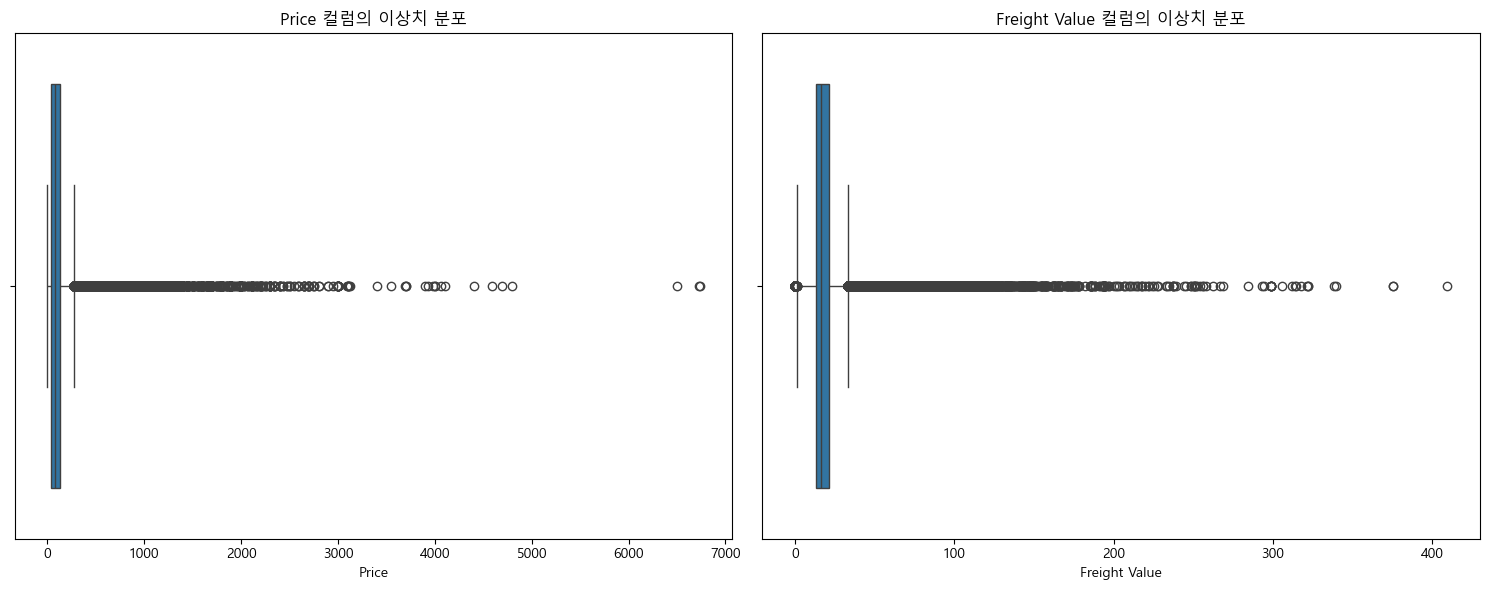

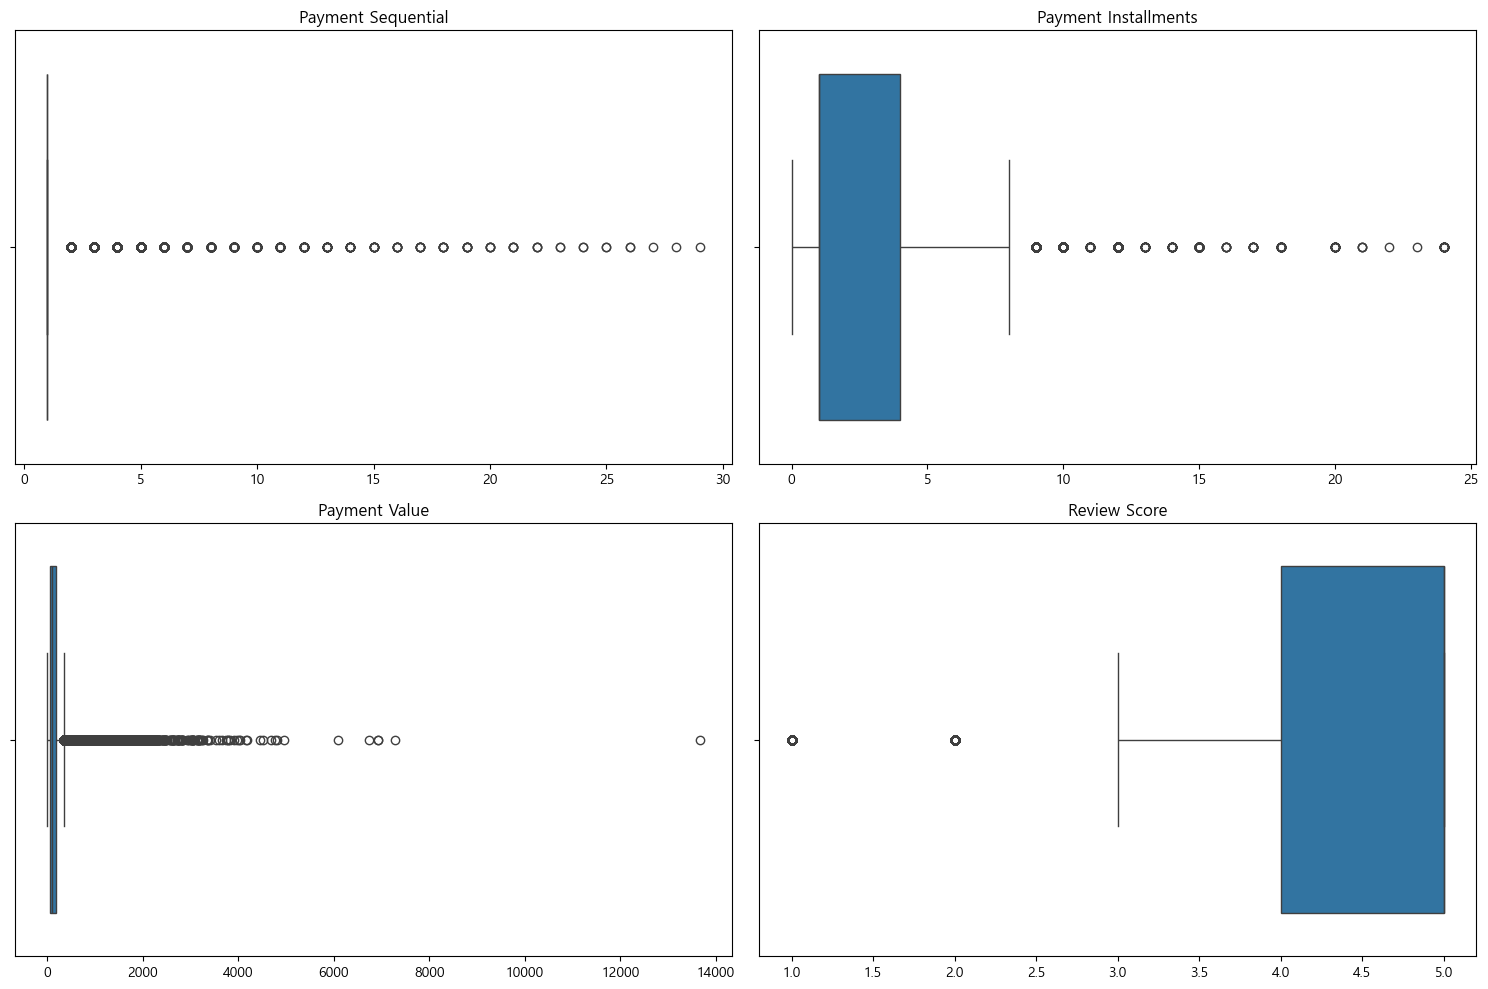

=== 결제ID 단위 그룹핑 (상위 20행) ===
                            order_id  payment_sequential payment_type  \
0   0bbb3f7791a87d0307555e57da3a1ff1                   1  credit_card   
1   0bbb3f7791a87d0307555e57da3a1ff1                   2      voucher   
2   0bbb3f7791a87d0307555e57da3a1ff1                   3      voucher   
3   0bbb3f7791a87d0307555e57da3a1ff1                   4      voucher   
4   0bbb3f7791a87d0307555e57da3a1ff1                   5      voucher   
5   0bbb3f7791a87d0307555e57da3a1ff1                   6      voucher   
6   0bbb3f7791a87d0307555e57da3a1ff1                   7      voucher   
7   0bbb3f7791a87d0307555e57da3a1ff1                   8      voucher   
8   0bbb3f7791a87d0307555e57da3a1ff1                   9      voucher   
9   0bbb3f7791a87d0307555e57da3a1ff1                  10      voucher   
10  0bbb3f7791a87d0307555e57da3a1ff1                  11      voucher   
11  1a611328643ae11146ba09a4425d2e12                   1  credit_card   
12  1a611328643ae11146

,결측수,결측율(%)
review_comment_title,87656,88.34
review_comment_message,58247,58.70



📊 products 데이터프레임 결측값 분석
⚠️ 결측치 존재


,결측수,결측율(%)
product_category_name,610,1.85
product_name_lenght,610,1.85
product_description_lenght,610,1.85
product_photos_qty,610,1.85
product_weight_g,2,0.01
product_length_cm,2,0.01
product_height_cm,2,0.01
product_width_cm,2,0.01



📊 sellers 데이터프레임 결측값 분석
✅ 결측값 없음. 완전

📊 product_category_name_translation 데이터프레임 결측값 분석
✅ 결측값 없음. 완전
결측치 삭제 후 DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB
None
------------------------------
결측치 삭제 후 결측치 개수:
product_id                    0
product_cat

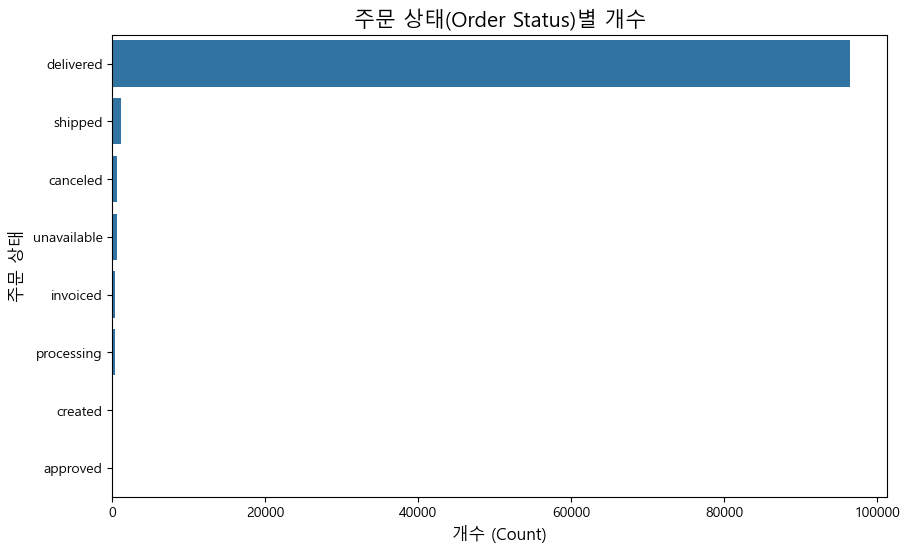

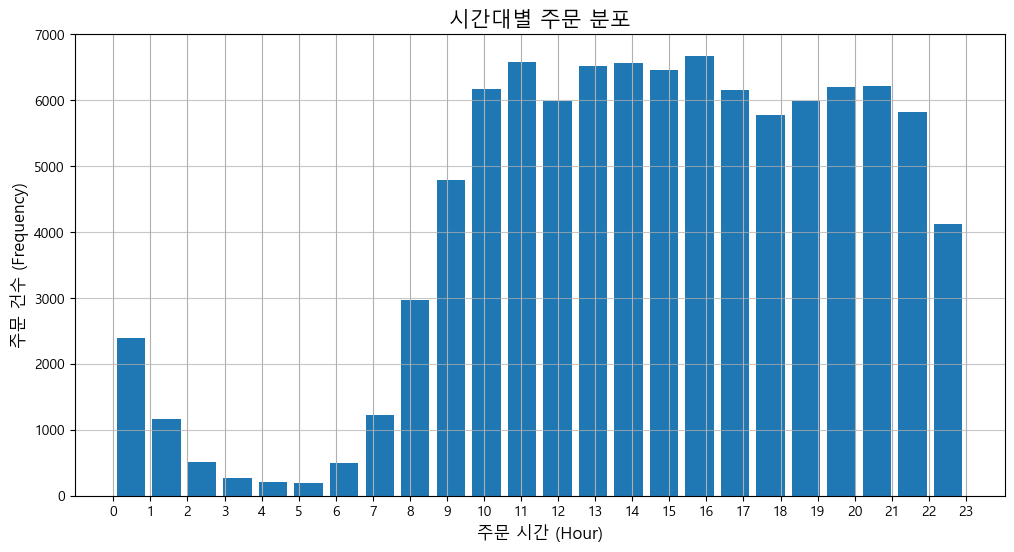

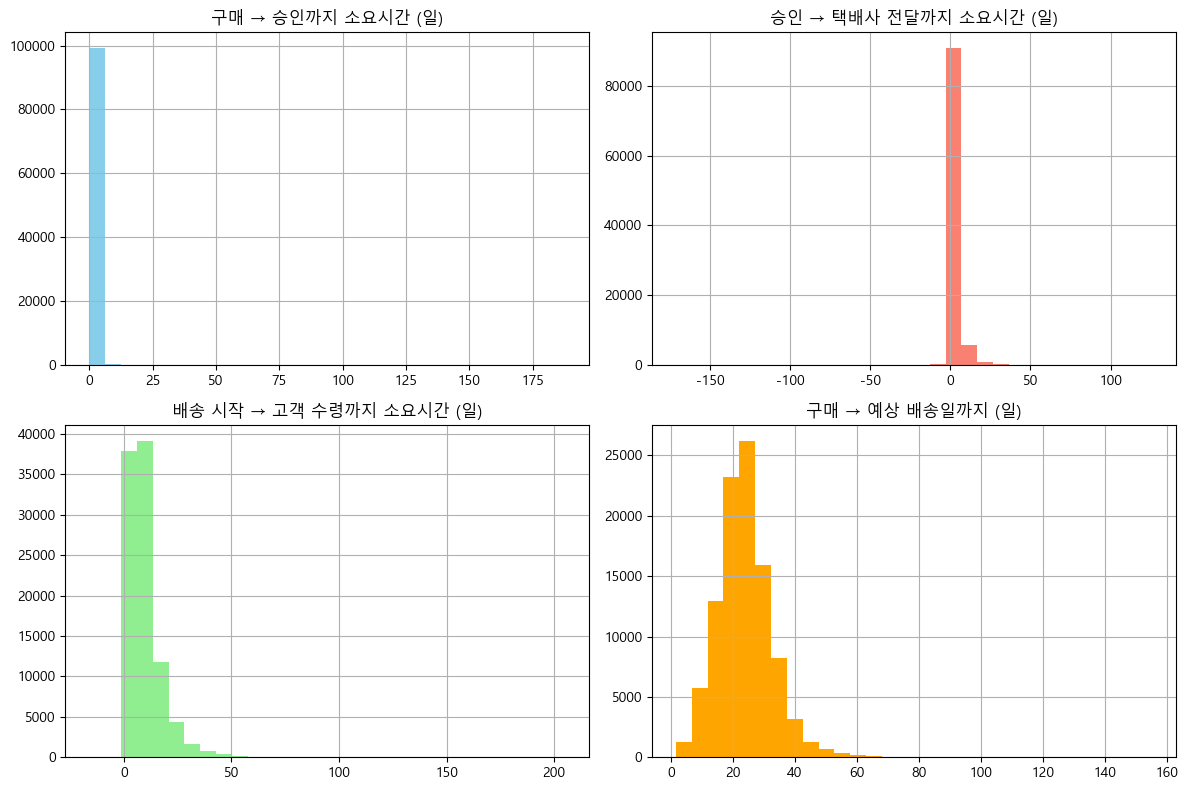

383
price            0.0000
freight_value    0.0034
dtype: float64
df_order_items 0값 개수:
0
📌 피어슨 상관계수:
                   price  freight_value
price          1.000000       0.414882
freight_value  0.414882       1.000000

📌 스피어맨 상관계수:
                   price  freight_value
price          1.000000       0.438325
freight_value  0.438325       1.000000


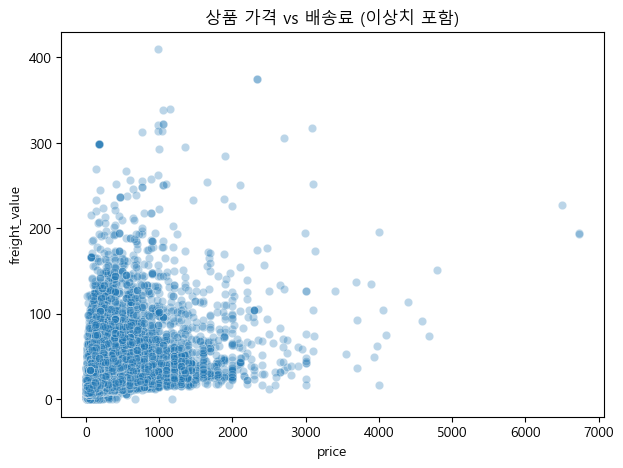

c:\Users\mumu1\Desktop\project_movie_data\과제1.py:351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_items['outlier'] = iso.fit_predict(df_order_items[['price','freight_value']])
c:\Users\mumu1\Desktop\project_movie_data\과제1.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_items["is_outlier"] = (df_order_items["outlier"] == -1).astype(int)


전체 데이터 행 수: 112267
IsolationForest 모델이 탐지한 이상치 개수: 1122
이상치 비율: 0.999403208422778 %
✅ df_order_reviews preview
                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   

   review_score review_comment_title review_comment_message  \
0             4     No Comment_title     No Comment_message   
1             5     No Comment_title     No Comment_message   
2             5     No Comment_title     No Comment_message   

  review_creation_date review_answer_timestamp  has_text  
0           2018-01-18     2018-01-18 21:46:59         0  
1           2018-03-10     2018-03-11 03:05:13         0  
2           2018-02-17     2018-02-18 14:36:24         0  

리뷰 총 개수: 99224
has_text 분포:
has_text
0    57.0
1    43.0
Name: proportion, dtype: float64


c:\Users\mumu1\Desktop\project_movie_data\과제1.py:408: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_items['The total order value'] = total_price + total_freight
c:\Users\mumu1\Desktop\project_movie_data\과제1.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_items['Total Sales'] = total_sales
c:\Users\mumu1\Desktop\project_movie_data\과제1.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

                            order_id  order_item_id  \
13  0008288aa423d2a3f00fcb17cd7d8719              1   
14  0008288aa423d2a3f00fcb17cd7d8719              2   

                          product_id                         seller_id  \
13  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
14  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   

    shipping_limit_date  price  freight_value  outlier  is_outlier  \
13  2018-02-21 02:55:52   49.9          13.37        1           0   
14  2018-02-21 02:55:52   49.9          13.37        1           0   

    The total order value  Total Sales  
13                 126.54   20258168.9  
14                 126.54   20258168.9  


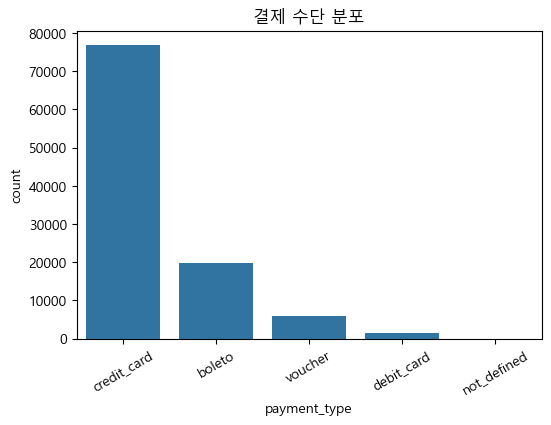


[결제 수단 비율]
payment_type
credit_card    0.739
boleto         0.190
voucher        0.056
debit_card     0.015
not_defined    0.000
Name: proportion, dtype: float64


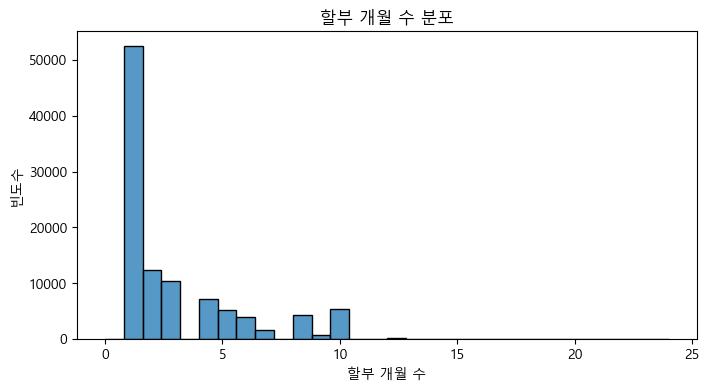


[할부 개월 수 통계]
count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64


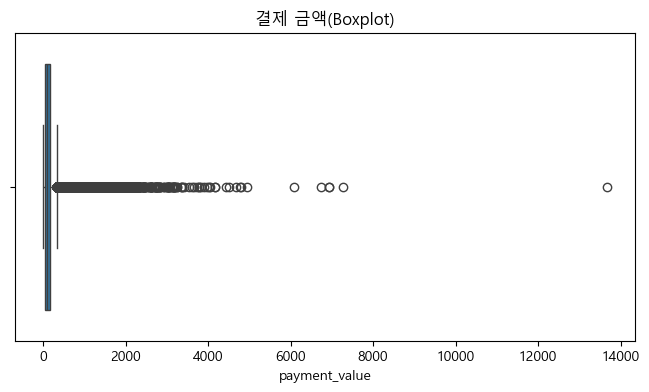

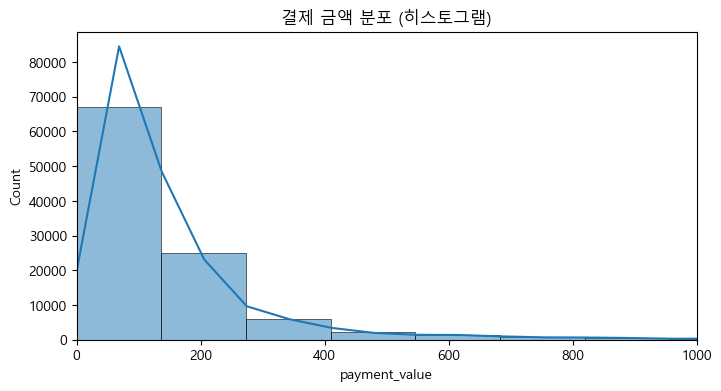


[결제 금액 통계]
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64
✅ Shapes (order, items, merged): (99441, 12) (112267, 11) (113380, 22)
✅ 주문 건수 유지 여부: 99441 → 99441

🔎 결측치 Top10 컬럼
 carrier_to_customer              3230
order_delivered_customer_date    3229
approved_to_carrier              1983
order_delivered_carrier_date     1968
order_item_id                    1113
product_id                       1113
outlier                          1113
is_outlier                       1113
The total order value            1113
freight_value                    1113
dtype: int64
아이템 없는 주문 수(고유 order_id): 1113

[아이템 없는 주문의 order_status 분포 - 건수]
 order_status
unavailable    603
delivered      336
canceled       164
created          5
shipped          3
invoiced         2
Name: count, dtype: int64

[아이템 없는 주문의 order_status 분포 - 비율(%)]


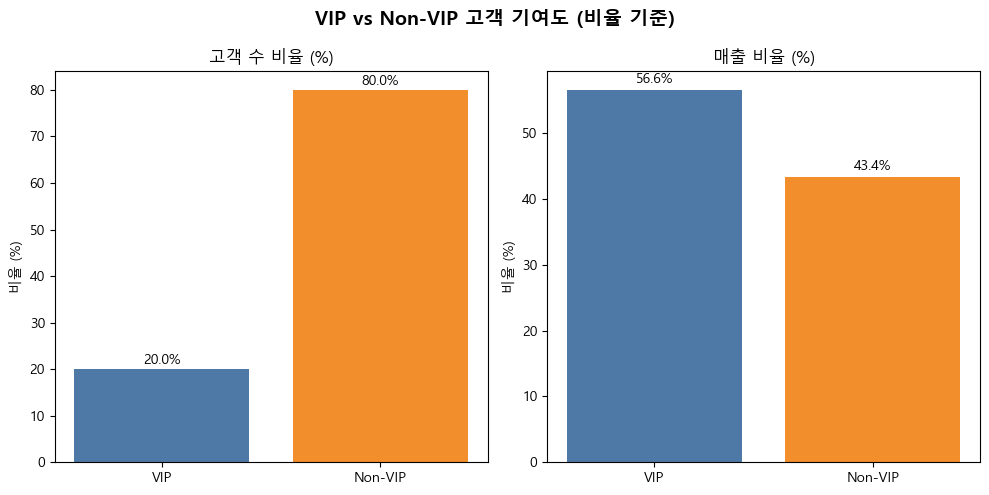

customer_state
SP    5192899.66
RJ    1815534.97
MG    1580228.93
RS     748801.22
PR     681181.67
SC     518904.84
BA     509699.39
DF     302144.44
GO     293445.95
ES     273419.01
PE     262040.63
CE     226251.31
PA     178877.91
MT     156122.84
MA     119548.32
MS     116533.04
PB     114829.38
PI      86760.28
RN      82765.28
AL      79943.21
SE      58820.95
TO      49551.84
RO      46030.64
AM      22356.84
AC      15982.95
AP      13374.40
RR       7829.43
Name: price, dtype: float64
customer_state
SP    38.31
RJ    13.39
MG    11.66
RS     5.52
PR     5.03
SC     3.83
BA     3.76
DF     2.23
GO     2.17
ES     2.02
PE     1.93
CE     1.67
PA     1.32
MT     1.15
MA     0.88
MS     0.86
PB     0.85
PI     0.64
RN     0.61
AL     0.59
SE     0.43
TO     0.37
RO     0.34
AM     0.16
AC     0.12
AP     0.10
RR     0.06
Name: price, dtype: float64


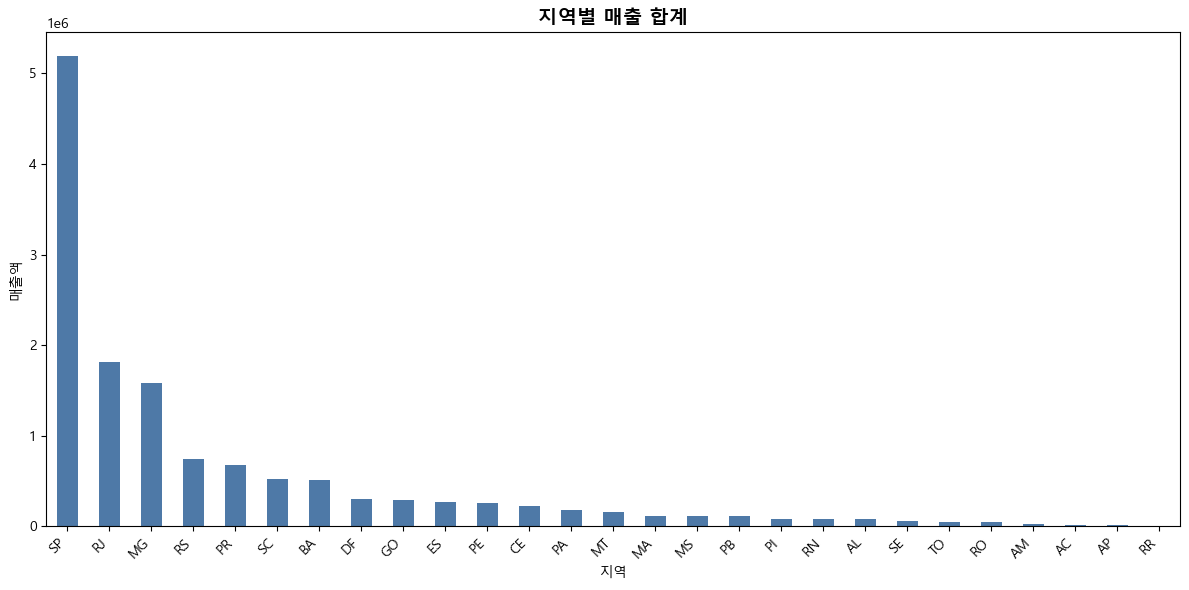

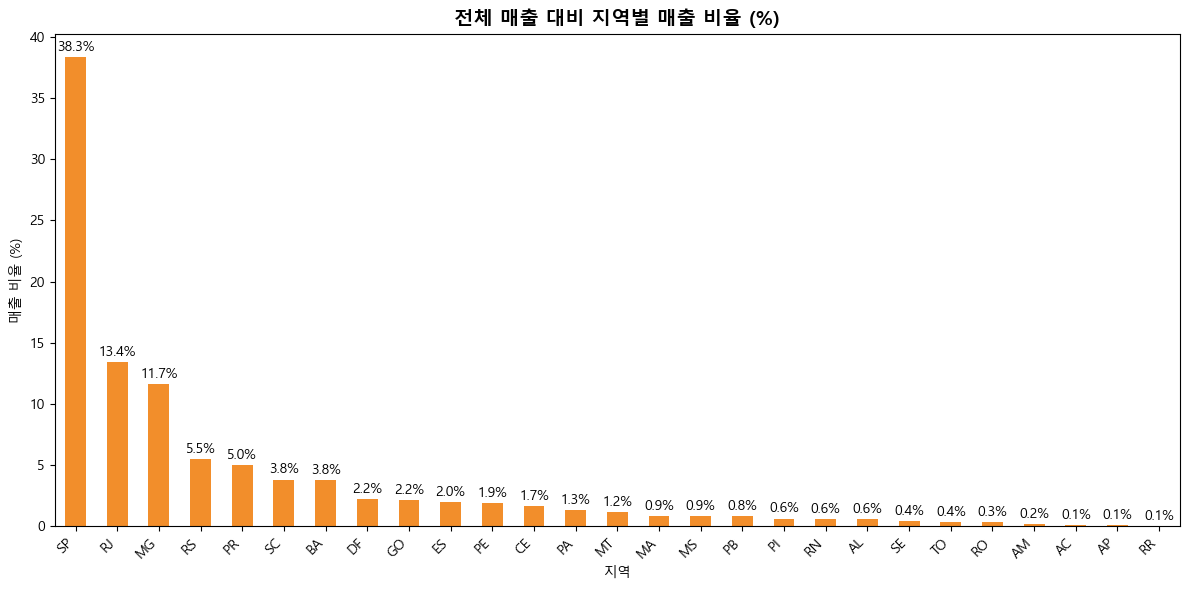

In [2]:
from 과제1 import df_sellers, df_order_reviews, merge_oics, df_product_category_name_translation

In [3]:
# --- 1) 배송 완료 건만 필터 ---
df = merge_oics[merge_oics["order_status"] == "delivered"].copy()

# 배송완료 건 중 배송완료일이 없는 8건 삭제
# 배송완료인데 배송일자 없는 주문 제외
df = merge_oics[
    ~((merge_oics["order_status"] == "delivered") &
      (merge_oics["order_delivered_customer_date"].isna()))
].copy()

print("제외 전 주문수:", merge_oics["order_id"].nunique())
print("제외 후 주문수:", df["order_id"].nunique())


제외 전 주문수: 98328
제외 후 주문수: 98320


📌 단계별 평균 배송시간(일 단위)
purchase_to_approved     0.44
approved_to_carrier      2.85
carrier_to_customer      9.18
purchase_to_customer    12.47
dtype: float64

📌 ETA 대비 KPI
총 배송건수          112259.00
정시배송율               91.36
지연배송율                8.64
평균 지연일(지연건만)        10.50
dtype: float64

📌 지연 구간 분포 (%)
delay_days
정시/조기        93.39%
1-3일 지연       1.92%
3-7일 지연       1.82%
7-14일 지연      1.47%
14-30일 지연     1.06%
30일 초과        0.34%
Name: proportion, dtype: object


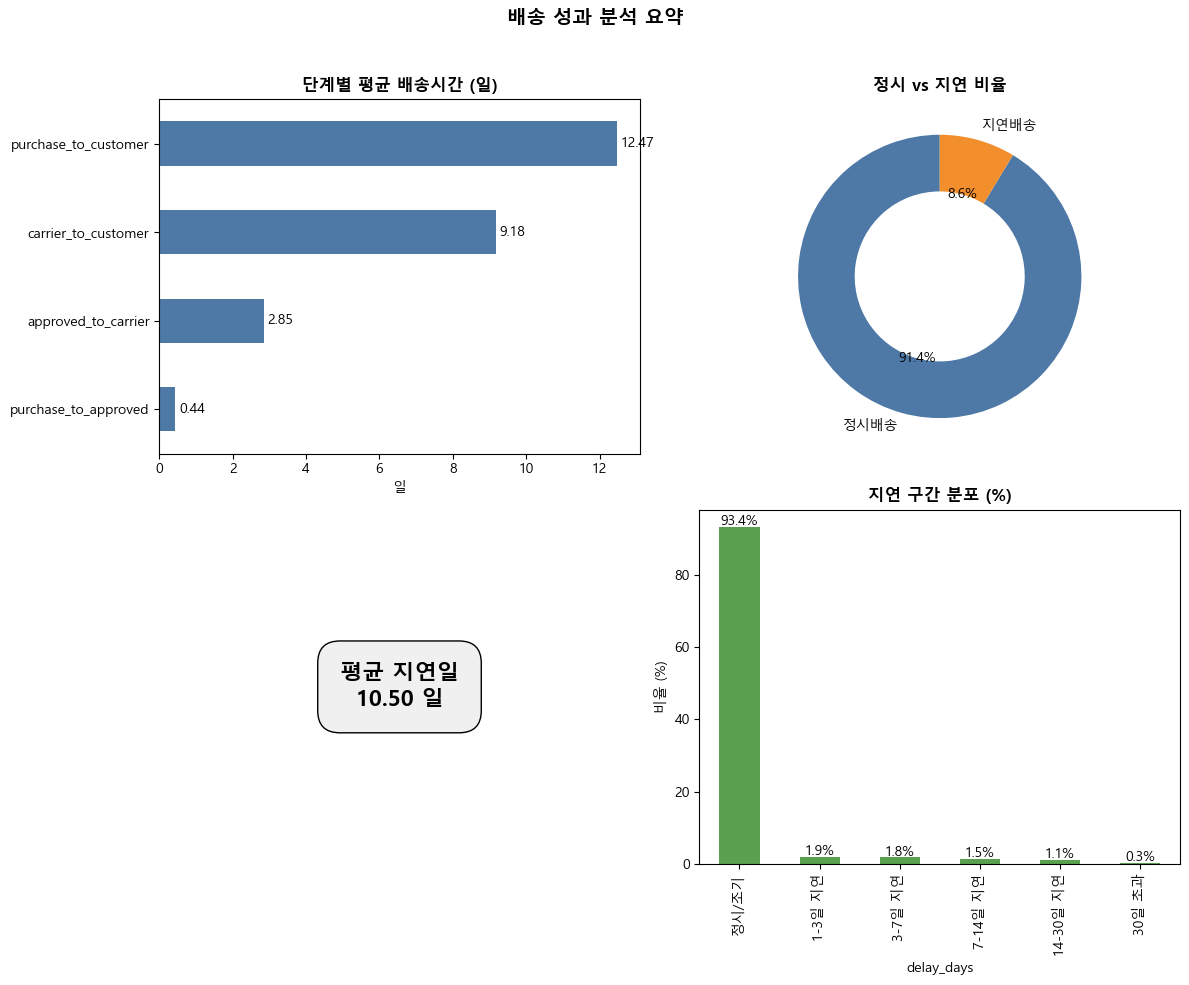

In [4]:
# 전체 지연구간 확인
# 전체 구간 (구매 ~ 고객 수령) 계산
df["purchase_to_customer"] = (
    df["order_delivered_customer_date"] - df["order_purchase_timestamp"]
).dt.total_seconds() / 86400   # 일 단위

# 단계별 평균 다시 계산
step_cols = ["purchase_to_approved", "approved_to_carrier", "carrier_to_customer", "purchase_to_customer"]
step_mean = df[step_cols].mean().round(2)
print("📌 단계별 평균 배송시간(일 단위)")
print(step_mean)

# --- 3) ETA 대비 지연일 계산 ---
# ETA는 날짜 단위 비교 권장 → floor("d") 처리
df["delay_days"] = (
    df["order_delivered_customer_date"].dt.floor("d")
    - df["order_estimated_delivery_date"].dt.floor("d")
).dt.days

# 정시/지연 여부
df["on_time"] = df["delay_days"] <= 0

# KPI 요약
total = len(df)
on_time = df["on_time"].sum()
late = total - on_time
avg_delay = df.loc[df["delay_days"] > 0, "delay_days"].mean()

kpi = {
    "총 배송건수": total,
    "정시배송율": round(on_time / total * 100, 2),
    "지연배송율": round(late / total * 100, 2),
    "평균 지연일(지연건만)": round(avg_delay, 2)
}
print("\n📌 ETA 대비 KPI")
print(pd.Series(kpi))

# --- 4) 지연 구간 분포 ---
bins = [-np.inf, 0, 3, 7, 14, 30, np.inf]
labels = ["정시/조기", "1-3일 지연", "3-7일 지연", "7-14일 지연", "14-30일 지연", "30일 초과"]

delay_dist = pd.cut(df["delay_days"], bins=bins, labels=labels).value_counts(normalize=True).sort_index()
delay_dist = (delay_dist * 100).round(2)

print("\n📌 지연 구간 분포 (%)")
print(delay_dist.astype(str) + "%")

## 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# --- (1,1) 단계별 평균 배송시간 ---
step_mean.plot(kind="barh", color="#4e79a7", ax=axes[0,0])
axes[0,0].set_title("단계별 평균 배송시간 (일)", fontsize=12, fontweight="bold")
axes[0,0].set_xlabel("일")
for i, v in enumerate(step_mean):
    axes[0,0].text(v + 0.1, i, f"{v:.2f}", va="center")

# --- (1,2) 정시 vs 지연 비율 (도넛 차트) ---
labels = ["정시배송", "지연배송"]
sizes = [kpi["정시배송율"], kpi["지연배송율"]]
colors = ["#4e79a7", "#f28e2b"]
wedges, texts, autotexts = axes[0,1].pie(
    sizes, labels=labels, autopct="%.1f%%", startangle=90,
    colors=colors, wedgeprops=dict(width=0.4)
)
axes[0,1].set_title("정시 vs 지연 비율", fontsize=12, fontweight="bold")

# --- (2,1) 평균 지연일 (KPI 카드 스타일) ---
axes[1,0].axis("off")  # 축 숨기기
axes[1,0].text(
    0.5, 0.5,
    f"평균 지연일\n{avg_delay:.2f} 일",
    ha="center", va="center", fontsize=16, fontweight="bold",
    bbox=dict(facecolor="#f0f0f0", edgecolor="black", boxstyle="round,pad=1")
)

# --- (2,2) 지연 구간 분포 (막대그래프) ---
delay_dist.plot(kind="bar", color="#59a14f", ax=axes[1,1])
axes[1,1].set_title("지연 구간 분포 (%)", fontsize=12, fontweight="bold")
axes[1,1].set_ylabel("비율 (%)")
for i, v in enumerate(delay_dist):
    axes[1,1].text(i, v + 0.5, f"{v:.1f}%", ha="center")

plt.suptitle("배송 성과 분석 요약", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()



📌 주(state)별 배송 성과
                  주문수  평균_전체배송시간  정시배송율  평균_지연일
customer_state                                 
AC                 92      20.72   96.0   18.67
AL                439      24.41   76.0    9.87
AM                165      26.39   96.0   24.40
AP                 81      28.29   95.0   96.33
BA               3781      19.23   85.0   11.81
CE               1469      21.00   83.0   14.70
DF               2400      12.96   92.0    7.89
ES               2243      15.67   88.0   10.80
GO               2321      15.40   91.0   12.20
MA                823      21.65   80.0    9.87
MG              13070      11.98   94.0    8.41
MS                815      15.56   90.0    7.97
MT               1051      17.98   92.0   10.27
PA               1079      23.75   87.0   12.52
PB                598      20.58   87.0    9.95
PE               1798      18.27   88.0   11.73
PI                540      19.41   83.0   12.76
PR               5718      11.95   95.0    8.13
RJ              14492 

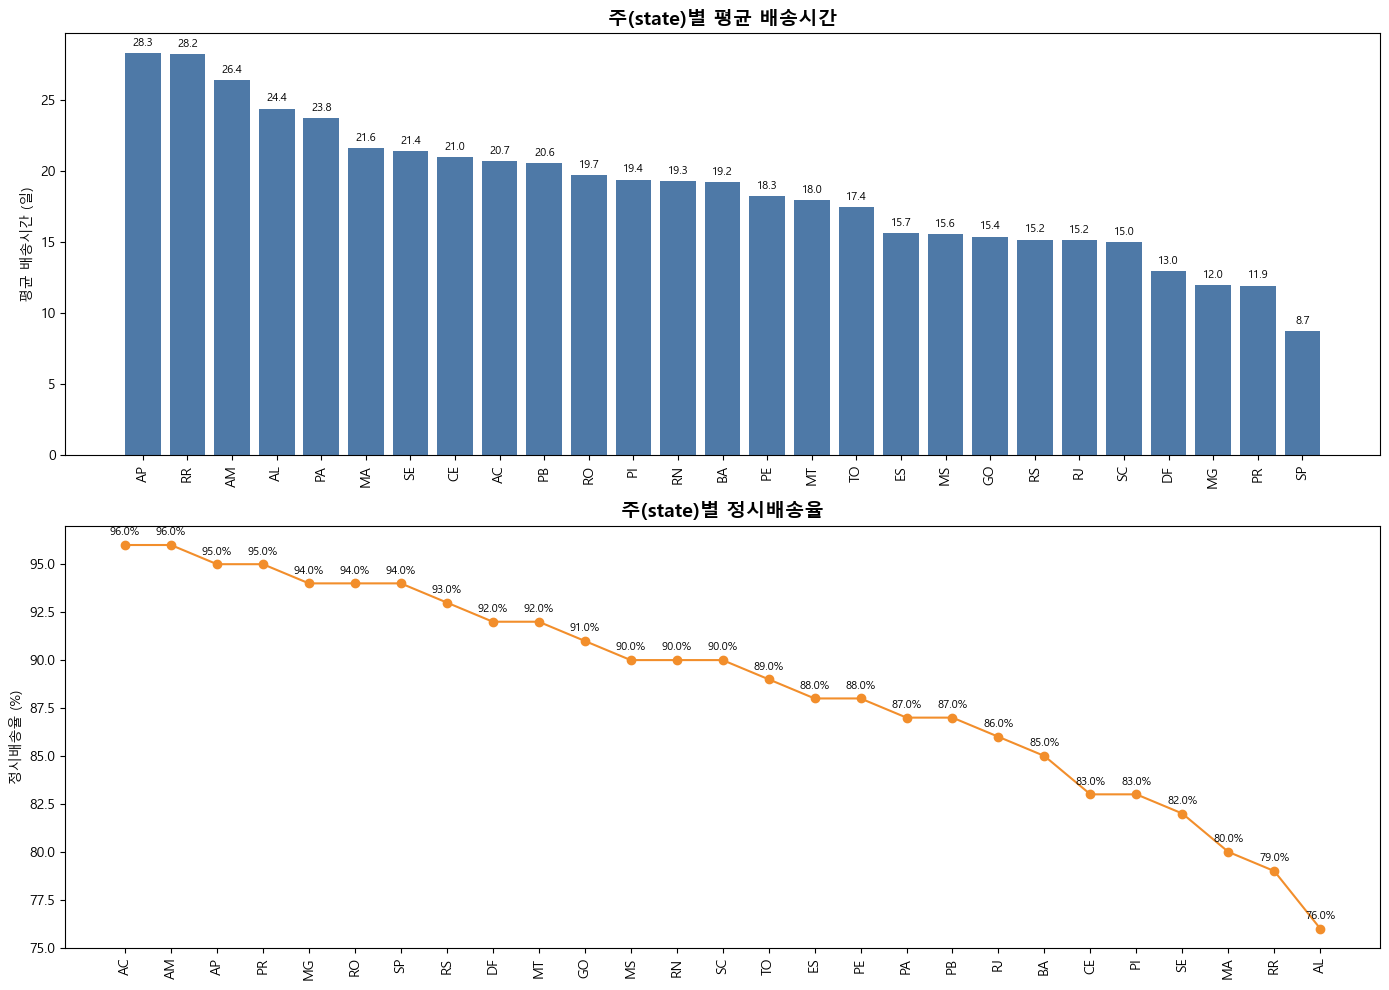

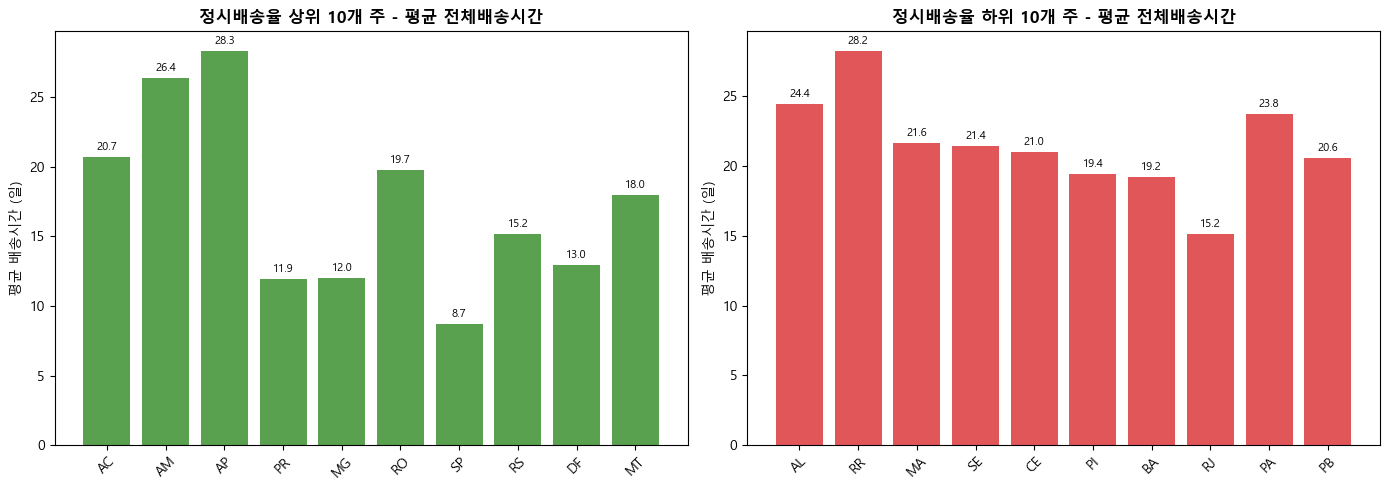

In [5]:
# 지역별 배송 성과
# 전체 구간 (구매 ~ 고객 수령) 계산
df["purchase_to_customer"] = (
    df["order_delivered_customer_date"] - df["order_purchase_timestamp"]
).dt.total_seconds() / 86400   # 일 단위

# ETA 대비 지연일 계산
df["delay_days"] = (
    df["order_delivered_customer_date"].dt.floor("d")
    - df["order_estimated_delivery_date"].dt.floor("d")
).dt.days

# 정시배송 여부
df["on_time"] = df["delay_days"] <= 0

# 주(state)별 집계
state_perf = (
    df.groupby("customer_state")
      .agg(
          주문수=("order_id", "count"),
          평균_전체배송시간=("purchase_to_customer", "mean"),
          정시배송율=("on_time", "mean"),
          평균_지연일=("delay_days", lambda x: x[x > 0].mean())
      )
      .round(2)
)

# 정시배송율을 %로 변환
state_perf["정시배송율"] = (state_perf["정시배송율"] * 100).round(2)
print("📌 주(state)별 배송 성과")
print(state_perf)

# top 5주, 하위 5주
# 상위 5개 주 (정시배송율 내림차순, 평균 전체배송시간 오름차순)
top5_states = state_perf.sort_values(
    by=["정시배송율", "평균_전체배송시간"],
    ascending=[False, True]
).head(5)

# 하위 5개 주 (정시배송율 오름차순, 평균 전체배송시간 내림차순)
bottom5_states = state_perf.sort_values(
    by=["정시배송율", "평균_전체배송시간"],
    ascending=[True, False]
).head(5)

print("📌 배송 성과 상위 5개 주")
print(top5_states)

print("\n📌 배송 성과 하위 5개 주")
print(bottom5_states)

## 시각화
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# (1행) 주별 평균 배송시간\
state_perf_sorted = state_perf.sort_values("평균_전체배송시간", ascending=False)
axes[0].bar(state_perf_sorted.index, state_perf_sorted["평균_전체배송시간"], color="#4e79a7")
axes[0].set_title("주(state)별 평균 배송시간", fontsize=14, fontweight="bold")
axes[0].set_ylabel("평균 배송시간 (일)")
axes[0].tick_params(axis='x', rotation=90)

for i, v in enumerate(state_perf_sorted["평균_전체배송시간"]):
    axes[0].text(i, v + 0.5, f"{v:.1f}", ha="center", fontsize=8)

# (2행) 주별 정시배송율
state_perf_sorted2 = state_perf.sort_values("정시배송율", ascending=False)
axes[1].plot(state_perf_sorted2.index, state_perf_sorted2["정시배송율"], marker="o", color="#f28e2b")
axes[1].set_title("주(state)별 정시배송율", fontsize=14, fontweight="bold")
axes[1].set_ylabel("정시배송율 (%)")
axes[1].tick_params(axis='x', rotation=90)

for i, v in enumerate(state_perf_sorted2["정시배송율"]):
    axes[1].text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=8)

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# 상위 10개, 하위 10개 주 선택
top10_states = state_perf.sort_values("정시배송율", ascending=False).head(10)
bottom10_states = state_perf.sort_values("정시배송율", ascending=True).head(10)

# 1행 2열 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# (왼쪽) 상위 10개 주
axes[0].bar(top10_states.index, top10_states["평균_전체배송시간"], color="#59a14f")
axes[0].set_title("정시배송율 상위 10개 주 - 평균 전체배송시간", fontsize=12, fontweight="bold")
axes[0].set_ylabel("평균 배송시간 (일)")
axes[0].tick_params(axis='x', rotation=45)

for i, v in enumerate(top10_states["평균_전체배송시간"]):
    axes[0].text(i, v + 0.5, f"{v:.1f}", ha="center", fontsize=8)

# (오른쪽) 하위 10개 주
axes[1].bar(bottom10_states.index, bottom10_states["평균_전체배송시간"], color="#e15759")
axes[1].set_title("정시배송율 하위 10개 주 - 평균 전체배송시간", fontsize=12, fontweight="bold")
axes[1].set_ylabel("평균 배송시간 (일)")
axes[1].tick_params(axis='x', rotation=45)

for i, v in enumerate(bottom10_states["평균_전체배송시간"]):
    axes[1].text(i, v + 0.5, f"{v:.1f}", ha="center", fontsize=8)

plt.tight_layout()
plt.show()



# 2. 고객 리뷰와 배송 지연 영향 분석

지역별 배송 성과 (평균 배송일수, 정시율, 지연율)
배송 지연 → 리뷰 점수 하락 여부

# merge

In [ ]:
# (merge_oics = df) + df_order_reviews => merge_oicsr
# product_category_name

review_agg = (
    df_order_reviews
    .groupby("order_id")
    .agg(
        review_score_mean=("review_score", "mean"),     # 평균 리뷰 점수
        review_count=("review_id", "count"),            # 리뷰 개수
        has_text=("has_text", "max"),                   # 텍스트 리뷰 여부 (1건이라도 있으면 1)
        first_review_date=("review_creation_date", "min"),
        last_review_date=("review_creation_date", "max"),
        sample_review_title=("review_comment_title", "first"),
        sample_review_message=("review_comment_message", "first")
    )
    .reset_index()
)

# =========================================
# 3) 배송 데이터와 합병
# =========================================
merge_oicsr = merge_oics.merge(
    review_agg,
    on="order_id",
    how="left"    # 리뷰 없는 주문도 유지
)

# 4) 확인
print("merge_oics shape:", merge_oics.shape)
print("review_agg shape:", review_agg.shape)
print("merge_oicsr shape:", merge_oicsr.shape)

merge_oics shape: (112267, 29)
review_agg shape: (98673, 8)
merge_oicsr shape: (112267, 36)


건수(주문 기준):
on_time
True     89123
False     6372
Name: count, dtype: int64

평균 리뷰 점수 (주문 단위):
on_time
지연    2.270951
정시    4.289927
Name: review_score_mean, dtype: float64

표준편차:
on_time
지연    1.570454
정시    1.148433
Name: review_score_mean, dtype: float64

정시 - 지연 평균 점수 차이: 2.019


C:\Users\mumu1\AppData\Local\Temp\ipykernel_17252\2081197667.py:67: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(plot_data, labels=labels, showmeans=True)


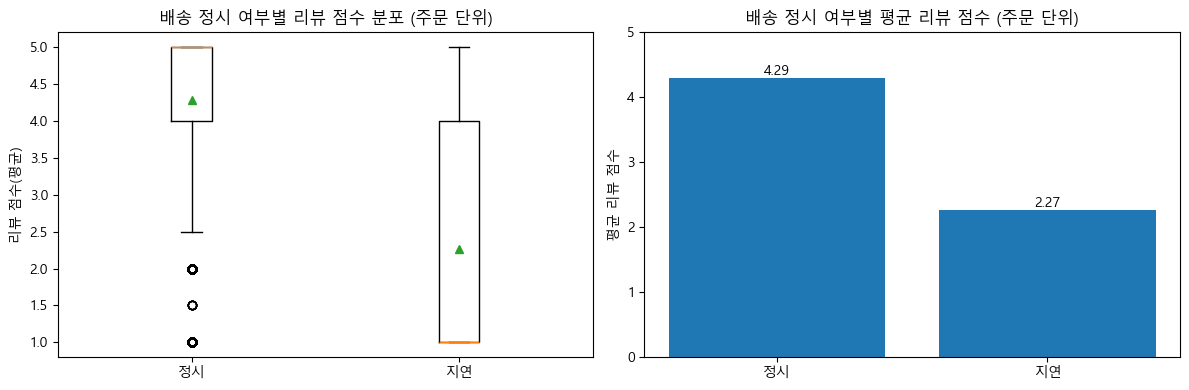

In [ ]:
# 지연 여부에 따른 리뷰 점수 비교
# ===== 0) 주문 단위로 정리 (중복 제거) =====
# review_score_mean이 주문 단위 지표이므로 order_id당 1행으로
order_cols = [
    "order_id",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "review_score_mean",
    "review_count"
]
dfm = (
    merge_oicsr[order_cols]
    .drop_duplicates(subset=["order_id"])
    .copy()
)

# ===== 1) 지연일수/정시 여부 생성 =====
# delay_days = (실제 고객 수령일 - 예상수령일) [일]
dfm["delay_days"] = (
    dfm["order_delivered_customer_date"].dt.floor("D")
    - dfm["order_estimated_delivery_date"].dt.floor("D")
).dt.days

# 정시 여부: 0일 이하(예정보다 같거나 빠름) = True
dfm["on_time"] = dfm["delay_days"] <= 0

# 분석에 필요한 값만 남기기: 리뷰점수/배송일자 결측 제거
dfm = dfm.dropna(subset=["review_score_mean", "order_delivered_customer_date", "order_estimated_delivery_date"])

print("건수(주문 기준):")
print(dfm["on_time"].value_counts(dropna=False))

# ===== 2) 단순 평균 비교 =====
avg_by_on_time = dfm.groupby("on_time", dropna=False)["review_score_mean"].mean()
std_by_on_time = dfm.groupby("on_time", dropna=False)["review_score_mean"].std()

print("\n평균 리뷰 점수 (주문 단위):")
print(avg_by_on_time.rename({True:"정시", False:"지연"}))

print("\n표준편차:")
print(std_by_on_time.rename({True:"정시", False:"지연"}))

diff = avg_by_on_time.get(True, np.nan) - avg_by_on_time.get(False, np.nan)
print("\n정시 - 지연 평균 점수 차이:", np.round(diff, 4))

## 시각화
# ===== 데이터 준비 =====
data_on  = dfm.loc[dfm["on_time"]==True,  "review_score_mean"].values
data_off = dfm.loc[dfm["on_time"]==False, "review_score_mean"].values

labels = ["정시", "지연"]
plot_data = [data_on, data_off]
# 비어있는 그룹 제외
labels = [lab for lab, arr in zip(labels, plot_data) if len(arr) > 0]
plot_data = [arr for arr in plot_data if len(arr) > 0]

x_labels = ["정시", "지연"]
y_vals = [avg_by_on_time.get(True, np.nan), avg_by_on_time.get(False, np.nan)]
pairs = [(x, y) for x, y in zip(x_labels, y_vals) if pd.notna(y)]

# ===== 2개 그래프 나란히 =====
fig, axes = plt.subplots(ncols=2, figsize=(12,4))

# (1) 박스플롯
axes[0].boxplot(plot_data, labels=labels, showmeans=True)
axes[0].set_title("배송 정시 여부별 리뷰 점수 분포 (주문 단위)")
axes[0].set_ylabel("리뷰 점수(평균)")

# (2) 평균 막대그래프
if pairs:
    x_plot, y_plot = zip(*pairs)
    axes[1].bar(x_plot, y_plot)
    for i, v in enumerate(y_plot):
        axes[1].text(i, v, f"{v:.2f}", ha="center", va="bottom")
    axes[1].set_ylim(0, 5)
    axes[1].set_title("배송 정시 여부별 평균 리뷰 점수 (주문 단위)")
    axes[1].set_ylabel("평균 리뷰 점수")
else:
    axes[1].set_visible(False)

plt.tight_layout()
plt.show()


=== 상관분석 결과 (주문 단위) ===
Pearson r = -0.2671, p-value = 0
Spearman r = -0.1761, p-value = 0

상관행렬 (Pearson):
                   delay_days  review_score_mean
delay_days           1.000000          -0.267103
review_score_mean   -0.267103           1.000000


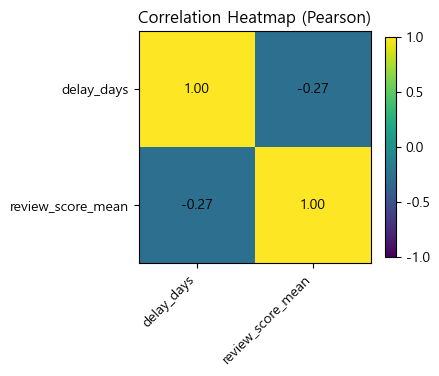

In [15]:
# 배송 지연 정도와 점수의 선형 관계 확인
from scipy.stats import pearsonr, spearmanr

# 1) 분석용 데이터 정리
order_cols = [
    "order_id",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "review_score_mean",
]
dfm = (
    merge_oicsr[order_cols]
    .drop_duplicates(subset=["order_id"])
    .copy()
)

# delay_days 계산: (실제 수령일 - 예상 수령일) [일]
dfm["delay_days"] = (
    dfm["order_delivered_customer_date"].dt.floor("D")
    - dfm["order_estimated_delivery_date"].dt.floor("D")
).dt.days

# 상관분석 대상만 남기기
dfc = dfm[["delay_days", "review_score_mean"]].dropna()

# 2) 상관계수 계산 (피어슨/스피어만)
pearson_r, pearson_p = pearsonr(dfc["delay_days"], dfc["review_score_mean"])
spearman_r, spearman_p = spearmanr(dfc["delay_days"], dfc["review_score_mean"])

print("=== 상관분석 결과 (주문 단위) ===")
print(f"Pearson r = {pearson_r:.4f}, p-value = {pearson_p:.4g}")
print(f"Spearman r = {spearman_r:.4f}, p-value = {spearman_p:.4g}")

# 3) 상관행렬(히트맵용)
corr_mat = dfc.corr(method="pearson")  # 필요시 'spearman'으로 변경 가능
print("\n상관행렬 (Pearson):")
print(corr_mat)

# 4) 히트맵 시각화 (matplotlib만 사용)
fig, ax = plt.subplots(figsize=(4.5, 4))
im = ax.imshow(corr_mat.values, vmin=-1, vmax=1)
ax.set_xticks(range(corr_mat.shape[1]))
ax.set_yticks(range(corr_mat.shape[0]))
ax.set_xticklabels(corr_mat.columns, rotation=45, ha="right")
ax.set_yticklabels(corr_mat.index)
ax.set_title("Correlation Heatmap (Pearson)")
# 셀 값 주석
for (i, j), val in np.ndenumerate(corr_mat.values):
    ax.text(j, i, f"{val:.2f}", ha="center", va="center", color="black")
fig.colorbar(im, ax=ax, shrink=0.8)
plt.tight_layout()
plt.show()


=== 주별 delay_days ↔ review_score_mean 상관관계 ===
   customer_state  pearson_r        p_value  n_orders
5              CE  -0.467834   9.750453e-70      1264
1              AL  -0.460527   7.192713e-22       390
13             PA  -0.416755   1.855193e-40       932
18             RJ  -0.404840   0.000000e+00     12147
19             RN  -0.402377   1.216897e-19       468
15             PE  -0.396816   1.794693e-60      1573
24             SE  -0.394887   7.138221e-14       333
0              AC  -0.379634   5.144924e-04        80
11             MS  -0.373522   1.820947e-24       696
9              MA  -0.367361   3.871987e-24       711
14             PB  -0.334910   8.318875e-15       509
16             PI  -0.323645   6.743246e-13       469
23             SC  -0.319631   4.696521e-84      3504
7              ES  -0.296909   3.837962e-41      1958
8              GO  -0.293489   9.572130e-40      1935
4              BA  -0.292980   1.213868e-64      3214
26             TO  -0.286692   1.52

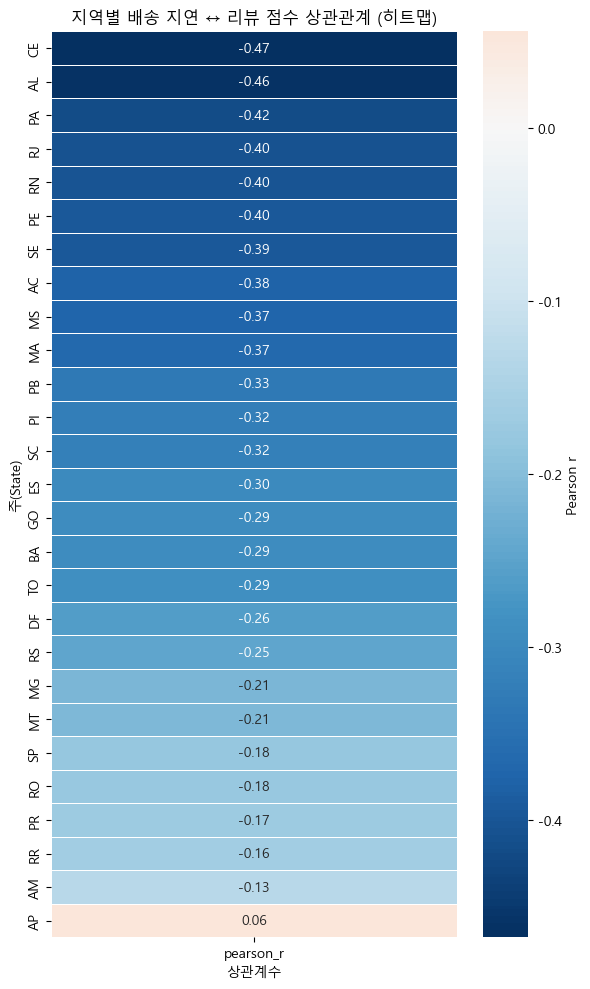

In [17]:
# 지역별 배송-리뷰 상관관계 분석

import pandas as pd
from scipy.stats import pearsonr

# 1) 주문 단위 데이터 준비
order_cols = [
    "order_id",
    "customer_state",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "review_score_mean"
]
dfm = merge_oicsr[order_cols].drop_duplicates(subset=["order_id"]).copy()

# delay_days 계산
dfm["delay_days"] = (
    dfm["order_delivered_customer_date"].dt.floor("D")
    - dfm["order_estimated_delivery_date"].dt.floor("D")
).dt.days

# 필요한 컬럼만
dfc = dfm[["customer_state", "delay_days", "review_score_mean"]].dropna()

# 2) 주(state)별 상관계수 계산
state_corrs = []
for state, group in dfc.groupby("customer_state"):
    if len(group) > 5:  # 샘플이 너무 적은 주는 제외
        r, p = pearsonr(group["delay_days"], group["review_score_mean"])
        state_corrs.append({"customer_state": state, "pearson_r": r, "p_value": p, "n_orders": len(group)})

state_corrs_df = pd.DataFrame(state_corrs).sort_values("pearson_r")

# 3) 결과 확인
print("=== 주별 delay_days ↔ review_score_mean 상관관계 ===")
print(state_corrs_df)

# 4) 시각화
# 피벗테이블 형태로 바꾸기 (state × pearson_r)
heatmap_data = state_corrs_df.set_index("customer_state")[["pearson_r"]]

# 히트맵 그리기
plt.figure(figsize=(6,10))
sns.heatmap(
    heatmap_data,
    annot=True, fmt=".2f", cmap="RdBu_r", center=0,
    linewidths=0.5, cbar_kws={'label': 'Pearson r'}
)
plt.title("지역별 배송 지연 ↔ 리뷰 점수 상관관계 (히트맵)")
plt.ylabel("주(State)")
plt.xlabel("상관계수")
plt.tight_layout()
plt.show()
